In [20]:
import pandas as pd 
data = pd.read_excel("C:\\Users\\hp\\Desktop\\FIRDAOUSS\\PROJECT\\data_cleaned_ready_for_desc.xlsx")

In [3]:
data_copy=data

In [4]:
print("Colonnes du DataFrame :", data.columns)


Colonnes du DataFrame : Index(['CAPITAL_SOCIAL_OU_PERSONNEL_1_EX_PASSIF_FIAB_',
       'MAX_CA_TOT_PROD_ET_TOT_PROD__VAR_STK_PRD_',
       'IMMOBILISATIONS_CORPORELLES_BRUT_', 'Unnamed: 3',
       'CHIFFRES_D_AFFAIRES_RETENU_', 'CHARGES_NON_COURANTES_RETENU_',
       'IMPOT_SUR_RESULTAT_RETENU_DV_', 'RESULTAT_NON_COURANT_RETENU_',
       'CREDIT_TVA_REPORTABLE_31_12_', 'Secteur', 'FRAUDE',
       'RESULTAT_FISCAL_BRUT', 'ID', 'REGION', 'TYPE_LIASSE_',
       'TYPE_DECLARATION_', 'CREATION_RECENTE', 'MAROCAIN'],
      dtype='object')


## Percentage of fraudulent companies by sector

Secteur
Bien et Service    73.471568
Industrie          26.346214
Non classifié       0.113101
Agriculture         0.069117
Name: count, dtype: float64


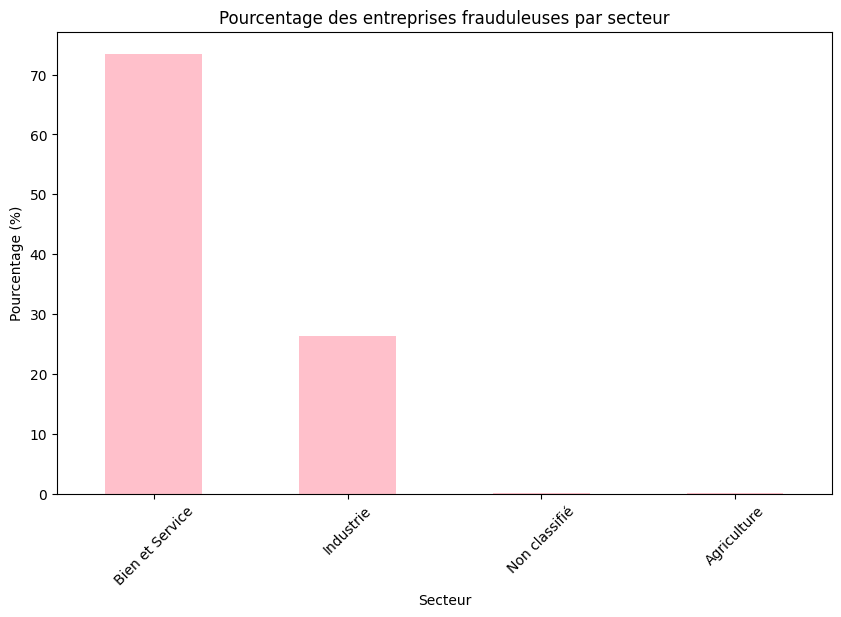

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que 'data' soit votre DataFrame
# Filtrer les entreprises qui ont fraudé
fraudulent_data = data[data['FRAUDE'] == 1]

# Calculer le nombre d'entreprises par secteur
sector_counts = fraudulent_data['Secteur'].value_counts()

# Calculer les pourcentages
sector_percentages = (sector_counts / sector_counts.sum()) * 100

# Affichage des pourcentages
print(sector_percentages)

# Visualiser le pourcentage d'entreprises par secteur
plt.figure(figsize=(10, 6))
sector_percentages.plot(kind='bar', color='pink')
plt.title('Pourcentage des entreprises frauduleuses par secteur')
plt.xlabel('Secteur')
plt.ylabel('Pourcentage (%)')
plt.xticks(rotation=45)
plt.show()


## Distribution of fraudulent and non-fraudulent companies

C:\Users\fou\AppData\Local\Temp\ipykernel_23256\2250534543.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')


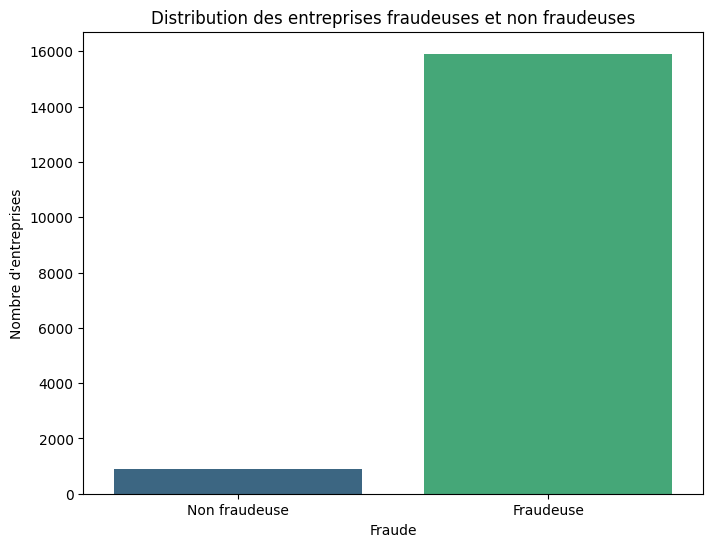

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Vérification des valeurs dans la variable cible 'fraude'
fraud_counts = data['FRAUDE'].value_counts()

# Histogramme
plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')
plt.title('Distribution des entreprises fraudeuses et non fraudeuses')
plt.xlabel('Fraude')
plt.ylabel('Nombre d\'entreprises')
plt.xticks(ticks=[0, 1], labels=['Non fraudeuse', 'Fraudeuse'])
plt.show()

**We will create another variable where 0 means Moroccan and 1 means non-Moroccan.**

In [6]:
data['MAROCAIN'] = data['MAROCAIN'].map({'OUI': 0, 'NON': 1})
data_copy=data

## Distribution of regions of fraudulent companies

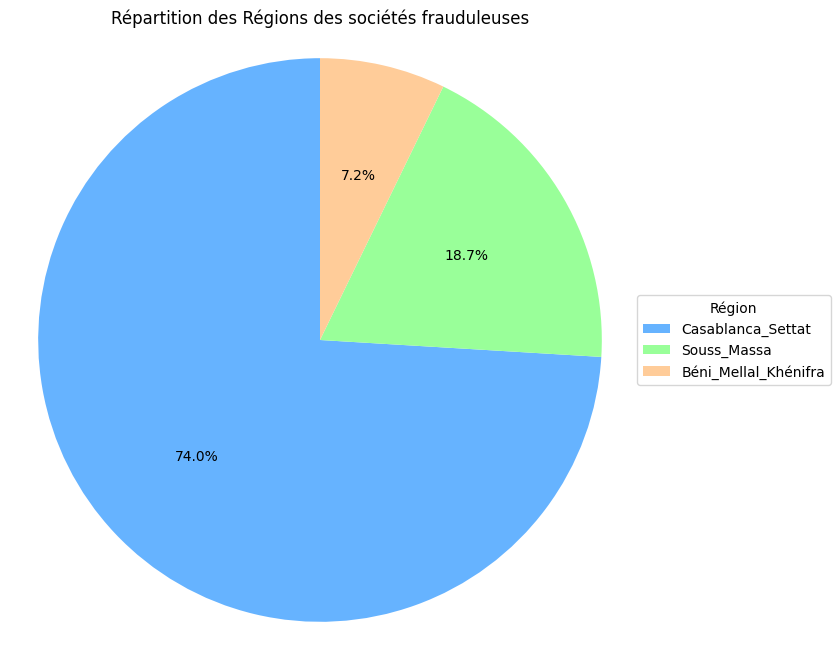

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que 'data' soit votre DataFrame
# Filtrer les entreprises qui ont fraudé
fraudulent_data = data[data['FRAUDE'] == 1]

# Compter le nombre de sociétés par région
nationality_counts = fraudulent_data['REGION'].value_counts()

# Créer un graphique circulaire
plt.figure(figsize=(8, 8))
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff6666']  # Couleurs des tranches

# Création du pie chart sans légende interne
plt.pie(nationality_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=colors)

# Ajouter une légende avec les noms des régions
plt.legend(nationality_counts.index, title="Région", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Répartition des Régions des sociétés frauduleuses')
plt.axis('equal')  # Assure que le graphique est bien circulaire
plt.show()


### Distribution of companies across different sectors

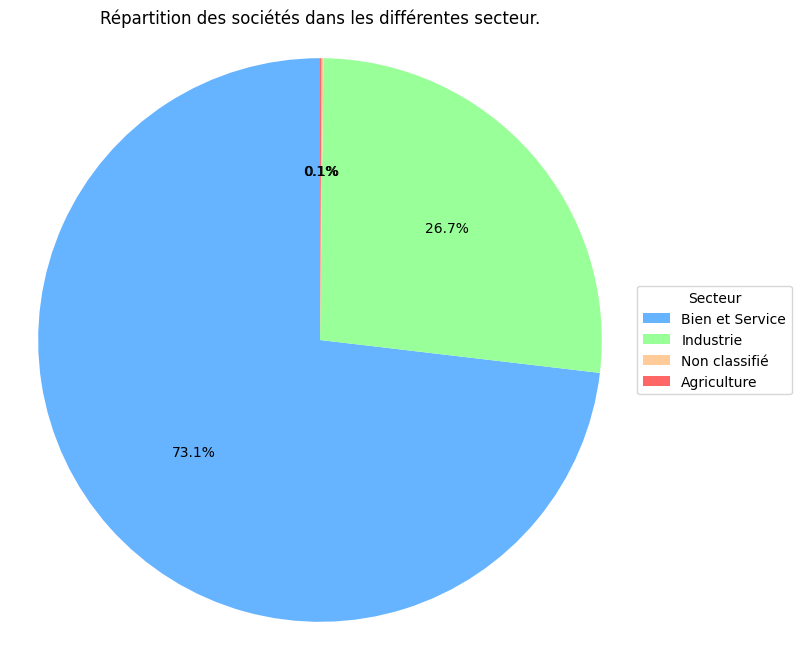

In [9]:
# Compter le nombre de sociétés par nsecteur
nationality_counts = data['Secteur'].value_counts()

# Créer un graphique circulaire
plt.figure(figsize=(8, 8))
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff6666']  # Couleurs des tranches

# Création du pie chart sans légende interne
plt.pie(nationality_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=colors)

# Ajouter une légende avec les noms des nationalités
plt.legend(nationality_counts.index, title="Secteur", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Répartition des sociétés dans les différentes secteur.')
plt.axis('equal')  # Assure que le graphique est bien circulaire
plt.show()

In [17]:
data=data.drop('ID', axis=1)
data=data.drop('Secteur', axis=1)
data= data.drop('RESULTAT_FISCAL_BRUT' , axis = 1)


In [18]:
data=data.drop('FRAUDE', axis=1)



In [7]:
data= data.drop('REGION' , axis = 1)
data= data.drop('TYPE_LIASSE_' , axis = 1)
data= data.drop('TYPE_DECLARATION_' , axis = 1)
data= data.drop('CREATION_RECENTE' , axis = 1)
data= data.drop('MAROCAIN' , axis = 1)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [9]:
# Convert the scaled data back to a DataFrame
data = pd.DataFrame(data_scaled, columns=data.columns)


In [10]:
data.var(axis=0)

CAPITAL_SOCIAL_OU_PERSONNEL_1_EX_PASSIF_FIAB_    1.000059
MAX_CA_TOT_PROD_ET_TOT_PROD__VAR_STK_PRD_        1.000059
IMMOBILISATIONS_CORPORELLES_BRUT_                1.000059
Unnamed: 3                                       1.000059
CHIFFRES_D_AFFAIRES_RETENU_                      1.000059
CHARGES_NON_COURANTES_RETENU_                    1.000059
IMPOT_SUR_RESULTAT_RETENU_DV_                    1.000001
RESULTAT_NON_COURANT_RETENU_                     1.000059
CREDIT_TVA_REPORTABLE_31_12_                     1.000059
dtype: float64

## Measurement of Multicollinearity and collinearity : 
so we see if there is any variables that we can combine or delete 

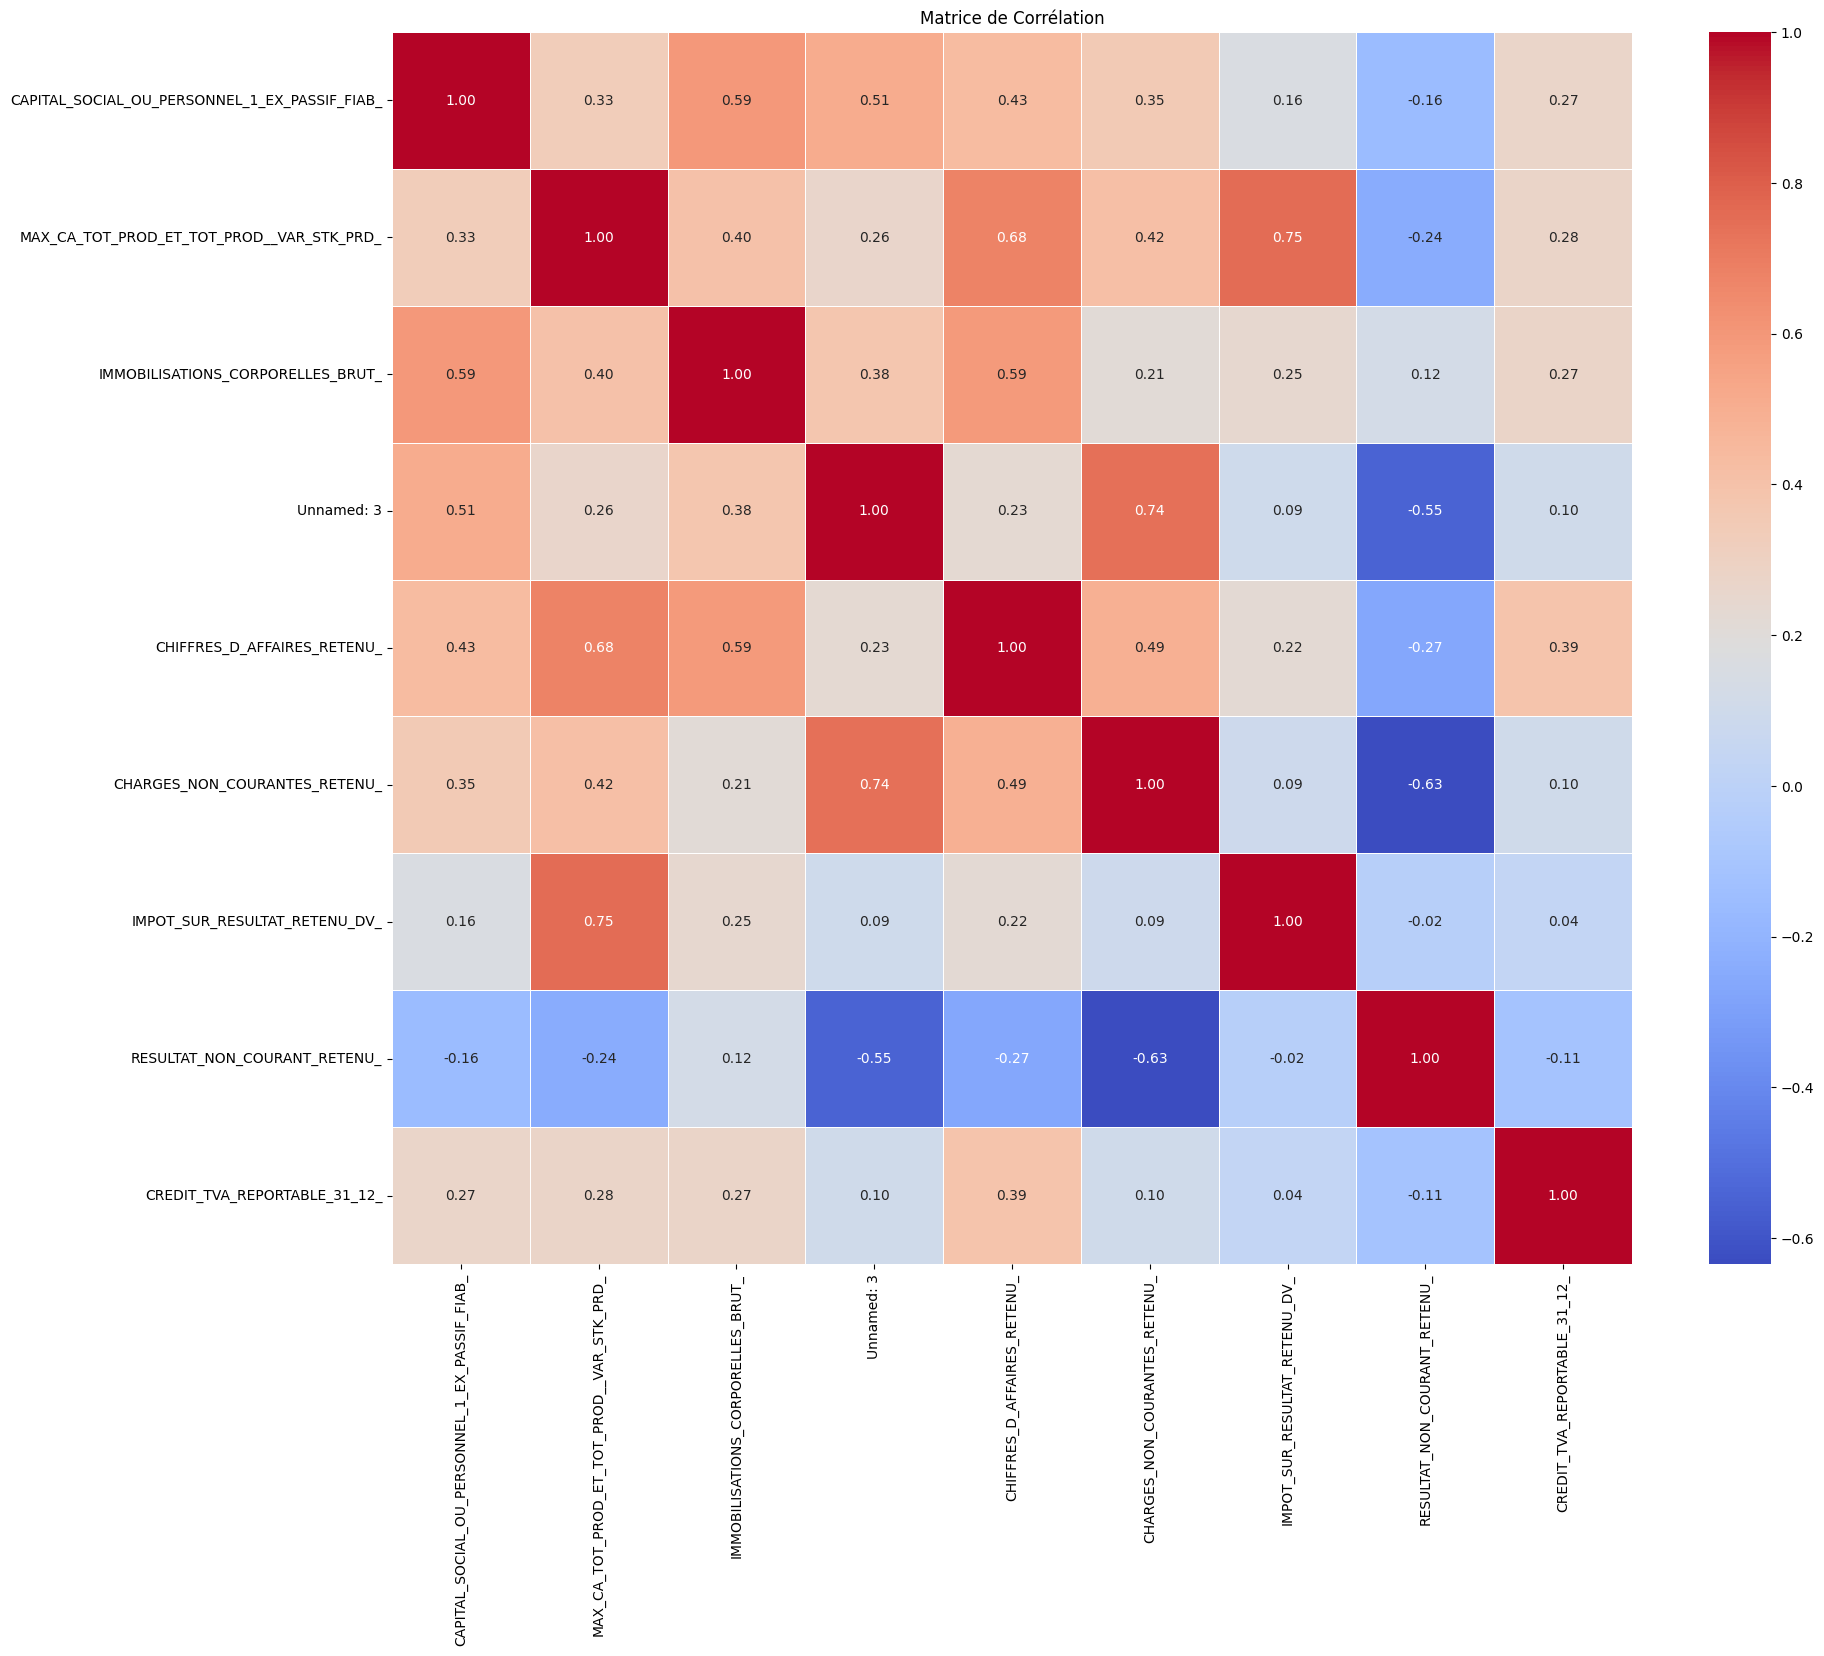

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=data
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Création de la figure
plt.figure(figsize=(20, 16))

# Tracer la matrice de corrélation avec une heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Ajouter un titre
plt.title('Matrice de Corrélation')

# Afficher le graphique
plt.show()


### Retrieve the categorical data

In [10]:
data['ID']=data_copy['ID']
data['Secteur']=data_copy['Secteur']
data['RESULTAT_FISCAL_BRUT']=data_copy['RESULTAT_FISCAL_BRUT']
data['FRAUDE']=data_copy['FRAUDE']
data['REGION']=data_copy['REGION']

data['TYPE_LIASSE_']=data_copy['TYPE_LIASSE_']

data['TYPE_DECLARATION_']=data_copy['TYPE_DECLARATION_']

data['CREATION_RECENTE']=data_copy['CREATION_RECENTE']

data['MAROCAIN']=data_copy['MAROCAIN']


In [11]:
data.columns

Index(['CAPITAL_SOCIAL_OU_PERSONNEL_1_EX_PASSIF_FIAB_',
       'MAX_CA_TOT_PROD_ET_TOT_PROD__VAR_STK_PRD_',
       'IMMOBILISATIONS_CORPORELLES_BRUT_', 'Unnamed: 3',
       'CHIFFRES_D_AFFAIRES_RETENU_', 'CHARGES_NON_COURANTES_RETENU_',
       'IMPOT_SUR_RESULTAT_RETENU_DV_', 'RESULTAT_NON_COURANT_RETENU_',
       'CREDIT_TVA_REPORTABLE_31_12_', 'ID', 'Secteur', 'RESULTAT_FISCAL_BRUT',
       'FRAUDE', 'REGION', 'TYPE_LIASSE_', 'TYPE_DECLARATION_',
       'CREATION_RECENTE', 'MAROCAIN'],
      dtype='object')

In [53]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)


                                              Feature           VIF
0       CAPITAL_SOCIAL_OU_PERSONNEL_1_EX_PASSIF_FIAB_  2.213956e+00
1           MAX_CA_TOT_PROD_ET_TOT_PROD__VAR_STK_PRD_  9.582310e+03
2                   IMMOBILISATIONS_CORPORELLES_BRUT_  2.827832e+01
3                                          Unnamed: 3  1.133180e+02
4                         CHIFFRES_D_AFFAIRES_RETENU_  6.201888e+03
5                             CHIFFRE_D_AFFAIRES_DRF_  1.414807e+03
6                                        BASE_CM_DRF_  2.077139e+02
7                      CHIFFRES_D_AFFAIRES_RETENU_DV_  1.117098e+04
8        VENTES_DE_BIENS_ET_SERVICES_PRODUITS_RETENU_  1.643758e+03
9                     PRODUITS_D_EXPLOITATION_RETENU_  2.117919e+07
10                     CHARGES_D_EXPLOITATION_RETENU_  1.787035e+07
11                    RESULTAT_D_EXPLOITATION_RETENU_  3.960916e+05
12                      CHARGES_NON_COURANTES_RETENU_  1.300577e+01
13                       RESULTAT_NON_COURANT_RE

In [13]:
file_path = "C:\\Users\\fou\\Desktop\\PROJECT\\trying a new thing\\data_cleaned_ready_for_desc_without_multicolinearité.xlsx"
data.to_excel(file_path, index=False)

In [ ]:
data=data.drop('Secteur', axis= 1)
data=data.drop('FRAUDE', axis= 1)
data=data.drop('ID', axis= 1)


In [31]:
L=[]
c=[]
for i in range(data.shape[1]):
    
    correlation = data.iloc[:, i].corr(data['MT PAYE SUITE AU CONTRÔLE'])
    print(f"Corrélation entre  var {i} et var2 : {correlation}")
    if correlation>= 0.5 or correlation<= -0.5 : 
        L.append(i)
        c.append(correlation)
        print(correlation)
        print(f" la variable {i} est fortement correler avec la var 2 ")

Corrélation entre  var 0 et var2 : 0.22357013858915806
Corrélation entre  var 1 et var2 : 0.7579143911876454
0.7579143911876454
 la variable 1 est fortement correler avec la var 2 
Corrélation entre  var 2 et var2 : 0.46613516712388936
Corrélation entre  var 3 et var2 : 0.7606546152527599
0.7606546152527599
 la variable 3 est fortement correler avec la var 2 
Corrélation entre  var 4 et var2 : 0.466240516298993
Corrélation entre  var 5 et var2 : 0.476219030743355
Corrélation entre  var 6 et var2 : 0.19135569962274293
Corrélation entre  var 7 et var2 : 0.7706389385690653
0.7706389385690653
 la variable 7 est fortement correler avec la var 2 
Corrélation entre  var 8 et var2 : 0.47252098274210674
Corrélation entre  var 9 et var2 : 0.4765783067822164
Corrélation entre  var 10 et var2 : 0.20115738787643692
Corrélation entre  var 11 et var2 : 0.683666087986524
0.683666087986524
 la variable 11 est fortement correler avec la var 2 
Corrélation entre  var 12 et var2 : 0.2113009260545704
Corré

In [33]:
df=['CAPITAL_SOCIAL_OU_PERSONNEL_1_EX_PASSIF_FIAB_',
       'MAX_CA_TOT_PROD_ET_TOT_PROD__VAR_STK_PRD_',
       'CHIFFRES_D_AFFAIRES_RETENU_', 'CHIFFRES_D_AFFAIRES_RETENU_DV_',
       'PRODUITS_D_EXPLOITATION_RETENU_', 'CHARGES_D_EXPLOITATION_RETENU_',
       'RESULTAT_D_EXPLOITATION_RETENU_', 'COTISATION_MINIMALE_DRF_',
       'TOTAL_DES_PRODUITS_I_IV_VIII_TOTAUX_EX_CPC_FIAB_',
       'TOTAL_DES_CHARGES_II_V_IX_XII_TOTAUX_EX_CPC_FIAB_',
       'RESULTAT_NET_COMPTABLE_RETENU_', 'RESULTAT_FISCAL_BRUT_RETENU_',
       'RESULTAT_BRUT_FISCAL_TAB_PASS_RETENU_', 'VALEUR_AJOUTEE_RETENU_',
       'EXCEDENT_BRUT_D_EXPLOITATION_EBE_OU_INSUFFISANCE_BRUTE_D_EXPLOITATION_IBE_EX_TFR_ESG_FIAB_',
       'CA_TVA_TOTAL_HT_RETENU_', 'CA_TVA_IMPOSABLE_RETENU_',
       'CONTRIBUTION_TOTALE_PRINCIPAL_', 'MT PAYE SUITE AU CONTRÔLE'
      ]

In [35]:
corr=[]
for i in L: 
    corr.append(df[i])

In [37]:
corr

['MAX_CA_TOT_PROD_ET_TOT_PROD__VAR_STK_PRD_',
 'CHIFFRES_D_AFFAIRES_RETENU_DV_',
 'COTISATION_MINIMALE_DRF_',
 'RESULTAT_FISCAL_BRUT_RETENU_',
 'CA_TVA_TOTAL_HT_RETENU_',
 'CA_TVA_IMPOSABLE_RETENU_',
 'CONTRIBUTION_TOTALE_PRINCIPAL_',
 'MT PAYE SUITE AU CONTRÔLE']

In [39]:
c

[0.7579143911876454,
 0.7606546152527599,
 0.7706389385690653,
 0.683666087986524,
 0.6797215817664544,
 0.5757280884006137,
 0.7413131889004562,
 1.0]

In [47]:
df_corr=data[['MAX_CA_TOT_PROD_ET_TOT_PROD__VAR_STK_PRD_',
 'CHIFFRES_D_AFFAIRES_RETENU_DV_',
 'COTISATION_MINIMALE_DRF_',
 'RESULTAT_FISCAL_BRUT_RETENU_',
 'CA_TVA_TOTAL_HT_RETENU_',
 'CA_TVA_IMPOSABLE_RETENU_',
 'CONTRIBUTION_TOTALE_PRINCIPAL_',
 'MT PAYE SUITE AU CONTRÔLE', 'BRANCHE_ACTIVITE', 'Secteur', 'FRAUDE', 'ID']]

In [49]:
file_path = "C:\\Users\\FIRD\\Desktop\\PROJECT\\secteur modelin before and after the deleting the 0\\SECTEUR_sans0_cleaned_datacorroler.xlsx"
df_corr.to_excel(file_path, index=False)

In [90]:
description = data.describe()

print(description)

       CapitalSocial     MaxCAProd  ChiffAffaire  ChiffAffaireDev  \
count   1.680000e+04  1.680000e+04  1.680000e+04     1.680000e+04   
mean    3.136925e+06  2.101540e+07  1.534458e+07     1.968490e+07   
std     4.229238e+07  2.863177e+08  1.847234e+08     2.781175e+08   
min    -6.450806e+06  0.000000e+00 -1.025256e+06    -1.025256e+06   
25%     1.000000e+04  2.462324e+04  1.398750e+04     1.833325e+04   
50%     1.000000e+05  4.113085e+05  3.589175e+05     3.719376e+05   
75%     1.000000e+05  2.358473e+06  2.081638e+06     2.135379e+06   
max     2.345390e+09  1.861631e+10  9.971272e+09     1.861631e+10   

       ProduitsExplo  ResultatExplo  CotisationMin  TotalProduits  \
count   1.680000e+04   1.680000e+04   1.680000e+04   1.680000e+04   
mean    1.557316e+07   9.873396e+05   8.108415e+04   1.632482e+07   
std     1.866665e+08   2.551989e+07   1.173476e+06   1.942988e+08   
min    -2.207997e+07  -2.157762e+08   0.000000e+00  -2.168594e+07   
25%     1.600000e+04  -2.317256e+

### detect ouliers
detect the ouliers and remove the rows that contains those ourliers

In [128]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import stats



# Detect outliers using Z-score
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)

# Remove rows with outliers
df_no_outliers = df[~outliers]

# Alternatively, apply robust scaling
robust_scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)

print(df_no_outliers.describe())
print(df_robust_scaled.describe())


                 0             1             2             3             4   \
count  11620.000000  11620.000000  11620.000000  11620.000000  11620.000000   
mean      -0.051984     -0.051804     -0.053476     -0.050732     -0.053706   
std        0.144720      0.092789      0.133326      0.089010      0.135832   
min       -0.149058     -0.073222     -0.083493     -0.070861     -0.202520   
25%       -0.077020     -0.073143     -0.083423     -0.070800     -0.084224   
50%       -0.074863     -0.071839     -0.081620     -0.069586     -0.082408   
75%       -0.074863     -0.065370     -0.072746     -0.063612     -0.073310   
max        2.841020      1.832559      2.831701      1.858123      2.812482   

                 5             6             7             8             9   \
count  11620.000000  11620.000000  11620.000000  11620.000000  11620.000000   
mean      -0.029562     -0.047748     -0.053957     -0.025760     -0.041180   
std        0.098846      0.086356      0.136100    

In [76]:
import pandas as pd 
data = pd.read_excel("C:\\Users\\FIRD\\Desktop\\PROJECT\\data after cleaning and obs.xlsx")
